In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
n1988 = pd.read_csv("~/data/birth/NATL1988.txt")

In [ ]:
# From the documentation of the detail natality file for 1990 data:
# NCHS has adopted a new policy on release of vital statistics unit record
# data files.  This new policy was implemented for the 1989 vital event
# files to prevent the inadvertent disclosure of individuals and institutions.
# As a result, the files for 1989 and later years do not contain the
# acutal day or the birth or the dates of birth of the mother or father.
# The geographic detail is also restricted...

# These datasets are currently distributed by the CDC Vital Satistics Online Portal
# https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm

# and the NATL1988.zip dataset is 
# https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/natality/Nat1988.zip
# with the data dictionary https://ftp.cdc.gov/pub/Health_Statistics/NCHS/Dataset_Documentation/DVS/natality/Nat1988doc.pdf


In [ ]:
n1988.head()

In [ ]:
len(n1988), type(n1988.iloc[0, 0]), n1988.columns

Pandas thought the first row was a header definition row (which isn't going to work with fixed-with fields like we have here).  I do not want to lose the first row, or call it by its true name, so turn off header parsing:

In [ ]:
n1988 = pd.read_csv("~/data/birth/NATL1988.txt", header=None)

In [ ]:
n1988.columns

In [ ]:
len(n1988.iloc[0,0])

Now I have a single column, creatively named "0"

In [ ]:
n1988[0]

And you can see I have an index running from 0 to 3,913,792

In [ ]:
n1988[0][0]

Accessing the rows with square brackets works, but I should probably use .loc

In [ ]:
n1988[0].loc[1000]

This is a row.. How long is it?

In [ ]:
len(n1988[0].loc[0])

In [ ]:
# This looks like a row.. can I get columns?

In [ ]:
n1988[0].loc[0][105:107]

It looks like I can access columns with square brackets and a column number.

In [ ]:
# Loop over the data, get the 60th column "birth order" and put it in a dataframe.
# I'll create an empty list, fill it with strings, and then 
# convert the list of strings into a dataframe.

p = []
for i in n1988.index:
    p.append(n1988[0].loc[i][60])
pf = pd.DataFrame(p)
pf.head()

Note the data formats.. I created a empty list, filled it with strings, and then converted a list of strings into a dataframe.

In [ ]:
pf.head()

In [ ]:
pf.value_counts()

In [ ]:
# This does not look right.  
# This does not look like column 60, birth order, but
# Column 61, the tens place of "detail live birth order"
#  OK.  This is the python-starts-at-zero property.

In [ ]:
# Loop over the data, get column 60 (total birth order recode 9) and 
# 41-42  (age of mother single years recode 36)  and put it in a dataframe.
p = []
q = []
for i in n1988.index:
    p.append(n1988[0][i][60-1])
    q.append(n1988[0][i][(41-1):(42-1+1)])

pf = pd.DataFrame({"BIRTHORDER": p, "MATERNALAGE":q})

In [ ]:
pf.head()

In [ ]:
pf["BIRTHORDER"].value_counts().sort_index()

In [ ]:
pf.MATERNALAGE.value_counts()

In [ ]:
pf.MATERNALAGE.value_counts().sort_index()

In [ ]:
dir(pf.MATERNALAGE.value_counts())

In [ ]:
pf.MATERNALAGE.value_counts().values

In [ ]:
plt.bar(pf["BIRTHORDER"].value_counts().index, pf["BIRTHORDER"].value_counts().values)
plt.xlabel("Birth order")

In [ ]:
plt.xlabel("Birth order")

In [ ]:
p = []
q = []
for i in n1988.index:
    p.append(n1988[0][i][60-1])
    q.append(n1988[0][i][(41-1):(42-1+1)])

pf = pd.DataFrame({"BIRTHORDER": p, "MATERNALAGE":q})

In [ ]:
# Loop over the data, get columns 84-87 (month and date of birth)
# and put it in a dataframe.
p = []
q = []
for i in n1988.index:
    p.append(n1988[0][i][(84-1):(85-1+1)]) # MONTH
    q.append(n1988[0][i][(86-1):(87-1+1)]) # DAY
birthdate = pd.DataFrame({"MONTH": p, "DAY":q})

In [ ]:
birthdate.MONTH.value_counts()

In [ ]:
months = birthdate.MONTH.value_counts().sort_values()
months

In [ ]:
months = birthdate.MONTH.value_counts().sort_index()
months

In [ ]:
plt.bar(months.index, months.values)

In [ ]:
birthdays = birthdate.DAY.value_counts().sort_index()
birthdays

In [ ]:
plt.bar(birthdays.index, birthdays)

In [ ]:
plt.figure(figsize=(8,4))
plt.bar(birthdays.index, birthdays)

In [ ]:
pd.to_datetime("1988-01-01")

In [ ]:
birthdate.head()

I'm pretty sure I'm going to need to change these into a time format to make good use of them.  Let us construct an ISO-8601-compliant string like 1988-01-02 and add it as a new column.

In [ ]:
birthdate["ISO8601"] = pd.to_datetime("1988" + birthdate["MONTH"]+ birthdate["DAY"])
birthdate["ISO8601"]

In [ ]:
# ValueError: unconverted data remains when parsing with format "%Y%m%d": "9", at position 291. 

# Believe it or not, this is good news.  October 99th is not being coded as a date.
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# we have options errors="ignore" which will set the date to the input or
# errors="coerce" which will set the date to Not a Time.
birthdate["DATE"] = pd.to_datetime("1988" + birthdate["MONTH"]+ birthdate["DAY"], errors="coerce")

In [ ]:
# It completes this time.  Look at the output 
birthdate.head()

In [ ]:
# This is the example code from a python module for making calendars:
# https://github.com/tomkwok/calplot

# This is verbatim the sample code: generate an array of 730 days, and 
# populate 500 of these days with random numbers.  Paint the result on 
# a calendar.  

import calplot
import numpy as np; np.random.seed(sum(map(ord, 'calplot')))
import pandas as pd
all_days = pd.date_range('1/1/2019', periods=730, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)
calplot.calplot(events)
events.head()

In [ ]:
# So if I paint all the days with random numbers, the blank spots vanish:

all_days = pd.date_range('1/1/1988', periods=365, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)
calplot.calplot(events)
events.head()

In [ ]:
datehist = birthdate["DATE"].value_counts()
datehist.head()

In [ ]:
# This looks promising.  Let us try making a calendar plot.
calplot.calplot(datehist)


In [ ]:
plt.bar(datehist)

In [ ]:
plt.bar(range(len(datehist)), datehist)

In [ ]:
#  Aaaargghh.  When I created the histogram, it sorted by value, which is bad.
#  Why do we have a bimodal distribution here?

In [ ]:
plt.bar(range(len(datehist)), datehist.sort_index())

In [ ]:
plt.hist(datehist.values, bins=30)

In [ ]:
# Make this wider, more pleasant to look at
plt.figure(figsize=(10,4))
plt.bar(range(1,len(datehist)+1), datehist.sort_index(), width=1)
plt.xlabel ("Day in 1988")

In [ ]:
# This is not presentation-ready, but this gives us some pretty good insight into
# three drivers of birth timing, weekends, holidays, and a seasonal modulation.

In [ ]:
# Let us look back at our data parser, though.  
# It's slow, and I don't want to edit it every time
# a new column comes to my attention.

# SLOW

# Loop over the data, get columns 84-87 (month and date of birth)
# and put it in a dataframe.
p = []
q = []
for i in n1988.index:
    p.append(n1988[0][i][(84-1):(85-1+1)]) # MONTH
    q.append(n1988[0][i][(86-1):(87-1+1)]) # DAY
birthdate = pd.DataFrame({"MONTH": p, "DAY":q})

Looking at the description...

![Data description](FIELDS.jpg "Exceprt from data description showing Date and month fields")

To get the data into our computing environment, we have three tasks:
1. extract columns (with the right field width)
2. associate columns with human-readable names 
3. decode symbols 

If we can put the layout of the database *into data, instead of code*, we can expand the scope of our investigation by modifying data, *not code*.  This will work well for us.

In [ ]:
# let's start with trying to USING DATA TO SPECIFY THE LAYOUT,
# (Here, the column positions, widths, and names) 
# Write a parser that generates a dataframe with column names,
# and we can expand to more columns (and decode the symbols) later.


In [ ]:
# Let us start with something like these fields (which do not require decoding)
# This is a (pure python) list of lists
#  [ [startcolumn, stopcolumn, fieldname] ] 
dict1988 =[
    [84, 85, "MONTHOFBIRTH"],
    [86, 87, "DAYOFMONTH"],
]
# Since this is our data structure for our use, we can use any data type that works;
# there is no requirement that we use pandas or numpy here.


# Now, to organize my thoughts, I'm going to write a function prototype with a docstring that tells me what I need and what I promise to deliver.

In [ ]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists 
    datadictionary  (for example [[43, 44, "MATERNALAGE"]] ) 
    and return a pandas dataframe (same number of rows) with 
    labeled columns  '''

In [ ]:
#  Where to start?  For loop over data dictionary first, or for loop over data?
#  Hint: which one is more expensive? This is the one we will want to do once.
# 

In [ ]:
print(type(n1988[0]))
n1988[0]

In [ ]:
print(type(n1988[0].loc[42]))
n1988[0].loc[42]

In [ ]:
print(type(n1988[0].loc[42][83:84+1]))
n1988[0].loc[42][83:84+1]

In [ ]:
# So I can access the cth column and ith row with df[0].loc[i][c]

In [ ]:
# First I'm going to make certain I have the data I think I do
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    for index in natalitydata.index:
        for start, stop, column_name in datadictionary:
            if index < 3:
                print(index, start,stop, column_name)

In [ ]:
parse_natality(n1988, dict1988)

In [ ]:
# Above, we had hard-coded lists p and q that took all our intermediate data.  
# If we are going to automate column-extraction, we need a more flexible data structure.
# Dictionary of lists.
# So let's make a dictionary of empty lists first.
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    intermediate_data={}
    # First, populate intermediate_data with empty lists for each column_name
    for start, stop, column_name in datadictionary:
        intermediate_data[column_name] = []
    # Now loop through the data    
    for index in natalitydata.index:
        for start, stop, column_name in datadictionary:
            if index < 3:
                print(index, start,stop, column_name)
    return intermediate_data

In [ ]:
parse_natality(n1988, dict1988)

In [ ]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    intermediate_data={}
    # First, populate intermediate_data with empty lists for each column_name
    for start, stop, column_name in datadictionary:
        intermediate_data[column_name] = []
    for idx in natalitydata.index:
        for start, stop, column_name in datadictionary:
            if idx < 3:
                datafield = natalitydata.loc[idx][0][start:(stop+1)]
                print(idx, start,stop, column_name, datafield)
    return intermediate_data

In [ ]:
parse_natality(n1988, dict1988)

In [ ]:
# Well, that's not right.  Day of month 80?  Birth order 0?  Off-by-one again
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    intermediate_data={}
    for start, stop, column_name in datadictionary:
        intermediate_data[column_name] = []
    for idx in natalitydata.index:
        for start, stop, column_name in datadictionary:
            if idx < 3:
                datafield = natalitydata.loc[idx][0][start-1:(stop-1+1)]
                print(idx, start,stop, column_name, datafield)
    return intermediate_data

In [ ]:
parse_natality(n1988, dict1988)

In [ ]:
# These values look sane now, so let us put the data in lists.
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    intermediate_data={}
    for start, stop, column_name in datadictionary:
        intermediate_data[column_name] = []
    for idx in natalitydata.index:
        for start, stop, column_name in datadictionary:
            datafield = natalitydata.loc[idx][0][start-1:(stop-1+1)]
            intermediate_data[column_name].append(datafield)
   #         if idx < 3:
   #              print(idx, start,stop, column_name, natalitydata.loc[idx][0][start-1:(stop-1+1)])
    return intermediate_data

In [ ]:
parse_natality(n1988, dict1988)

In [ ]:
# Takes a while this time.  And it returns a hash of lists.  I'd prefer pandas data frames..
starttime = time.time()
parse_natality(n1988, dict1988)
stoptime = time.time()
print(stoptime-starttime)   # Agh.   12 minutes 

In [ ]:
# My code doesn't even give me a dataframe yet and it's taking forever.  
# Faster feedback will take me to my goal faster.. so create a dataframe 
# that only has 1% of the data: 
n1988sample = n1988[::100]
len(n1988sample)

In [ ]:
# transfer data from intermediate_data hash to pandas dataframe at the end
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    intermediate_data={}
    for start, stop, column_name in datadictionary:
        intermediate_data[column_name] = []
    for idx in natalitydata.index:
        for start, stop, column_name in datadictionary:
            intermediate_data[column_name].append(natalitydata.loc[idx][0][start-1:(stop-1+1)])
   #         if idx < 3:
   #              print(idx, start,stop, column_name, natalitydata.loc[idx][0][start-1:(stop-1+1)])
    df = pd.DataFrame()
    for start, stop, column_name in datadictionary:
        print(column_name)
        df[column_name] = pd.Series(intermediate_data[column_name])
    return df

In [ ]:
starttime=time.time()
df = parse_natality(n1988sample, dict1988)
stoptime=time.time()
print(stoptime-starttime)

In [ ]:
df

In [ ]:
#  This puts my data in a reasonably good place, but now I worry about efficiency.
#  This didn't take long, but it was 1% of the whole dataset.
#  I only have to run this when I want to get new columns, but still, I want to 
#  lower my personal cost of accessing information.

# Why am I looping through all 4M records?  Because I am accessing 
# the columns by .loc[i][colnumber].  Can pandas help me?
# https://pandas.pydata.org/pandas-docs/version/1.3/user_guide/text.html 

# pd.str.get() will extract a single column *as a pandas dataframe*,
# so I can get all the rows with a single operation. 

In [ ]:
n1988sample[0].str.get(80)

In [ ]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    df = pd.DataFrame()
    for start, stop, column_name in datadictionary:
        df[column_name] = natalitydata[0].str.get(start-1)
    return df


In [ ]:
starttime=time.time()
df = parse_natality(n1988sample, dict1988) 
stoptime=time.time()
print(stoptime-starttime)

In [ ]:
df

In [ ]:
# almost there, but pd.str.get()  only gets one column at a time.


In [ ]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    df = pd.DataFrame()
    for start, stop, column_name in datadictionary:
        # Get the first column (start)
        df[column_name] = natalitydata[0].str.get(start-1)
        # Get the remaining columns
        for i in range(1, stop-start + 1):
            df[column_name]=  df[column_name].str.cat(natalitydata[0].str.get(start-1+i))
    return df

In [ ]:
starttime=time.time()
df = parse_natality(n1988sample, dict1988) 
stoptime=time.time()
print(stoptime-starttime)
df.head()

In [ ]:
# Looks reasonable.  We can expand to the entire dataset and
# make sure it completes in a reaosonable time:
starttime=time.time()
df = parse_natality(n1988, dict1988) 
stoptime=time.time()
print(stoptime-starttime)
df.head()

In [161]:
type(df.MONTHOFBIRTH)

pandas.core.series.Series

In [162]:
# That doesn't answer my question
type(df.MONTHOFBIRTH[0])
# One more picky little request.. numeric data types?


numpy.int64

In [ ]:
def parse_natality(natalitydata, datadictionary):
    '''Take in pandas dataframe natalitydata and list-of-lists datadictionary
    (for example [[43, 44, "MATERNALAGE"]] ) and return a pandas dataframe (same 
    number of rows) with labeled columns  '''
    df = pd.DataFrame()
    for start, stop, column_name in datadictionary:
        # Get the first column (start)
        df[column_name] = natalitydata[0].str.get(start-1)
        # Get the remaining columns
        for i in range(1, stop-start + 1):
            df[column_name]=  df[column_name].str.cat(natalitydata[0].str.get(start-1+i))
    return df
    for start, stop, column_name in datadictionary:
        pd[column_name] = pd.to_numeric(pd[column_name])

In [163]:
#df = parse_natality(n1988, dict1988) 
type(df.MONTHOFBIRTH[0])
df.head()

,MONTHOFBIRTH,DAYOFMONTH,BIRTHODRDER,MATERNALAGE,STATE,PATERNALAGE,STATEA
0,1,8,2,23,1,22,AL
1,1,1,1,16,1,99,AL
2,1,7,3,24,1,26,AL
3,1,6,1,24,1,99,AL
4,1,1,4,26,1,99,AL


In [ ]:
# I am now satisfied that it is working.
dict1988 =[
    [84, 85, "MONTHOFBIRTH"],
    [86, 87, "DAYOFMONTH"],
    [60, 60, "BIRTHODRDER"],
    [41, 42, "MATERNALAGE"],
    [28, 29, "STATE"], 
    [69, 70, "PATERNALAGE"],
]

In [ ]:
starttime=time.time()
dfs = parse_natality(n1988.sample(n=1000), dict1988)
stoptime=time.time()
print(stoptime-starttime)

In [ ]:
dfs

In [ ]:
# After optimizations, this takes 41 seconds
starttime=time.time()
df = parse_natality(n1988, dict1988)
stoptime=time.time()
print(stoptime-starttime)

In [ ]:
# Checkpoint:
import os.path
from os import path
if not path.exists("births1988subset.csv"):
    print("saving births1988subset.csv", df.shape)
    df.to_csv("births1988subset.csv", index=None) 

In [164]:
df = pd.read_csv("births1988subset.csv")

In [165]:
age = df.MATERNALAGE.value_counts()

In [166]:
df.MATERNALAGE.value_counts().sort_index()

MATERNALAGE
10        15
11        36
12       223
13      1804
14      8511
15     25611
16     55186
17     95932
18    133487
19    168485
20    185349
21    199385
22    212940
23    228896
24    241980
25    251485
26    255604
27    256243
28    245423
29    232004
30    212852
31    185984
32    160421
33    134290
34    110971
35     88625
36     68112
37     50907
38     36545
39     25657
40     17491
41     11305
42      5845
43      3121
44      1639
45       772
46       390
47       137
48        88
49        42
Name: count, dtype: int64

In [167]:
age = df.MATERNALAGE.value_counts()

In [168]:
df.MATERNALAGE.value_counts().sort_index()

MATERNALAGE
10        15
11        36
12       223
13      1804
14      8511
15     25611
16     55186
17     95932
18    133487
19    168485
20    185349
21    199385
22    212940
23    228896
24    241980
25    251485
26    255604
27    256243
28    245423
29    232004
30    212852
31    185984
32    160421
33    134290
34    110971
35     88625
36     68112
37     50907
38     36545
39     25657
40     17491
41     11305
42      5845
43      3121
44      1639
45       772
46       390
47       137
48        88
49        42
Name: count, dtype: int64

<Axes: >

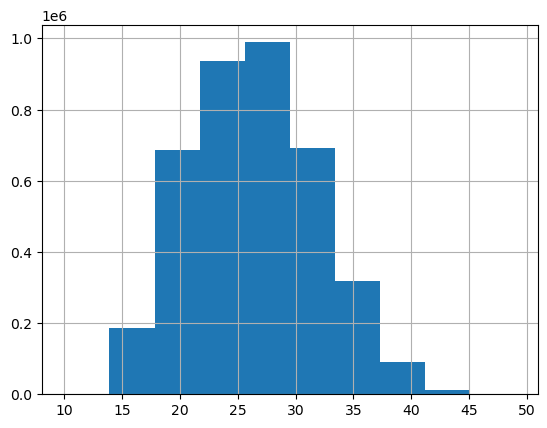

In [169]:
df.MATERNALAGE.hist()

<Axes: >

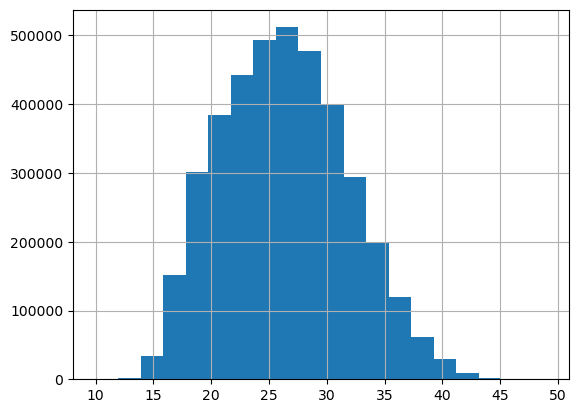

In [170]:
df.MATERNALAGE.hist(bins=20)

<Axes: >

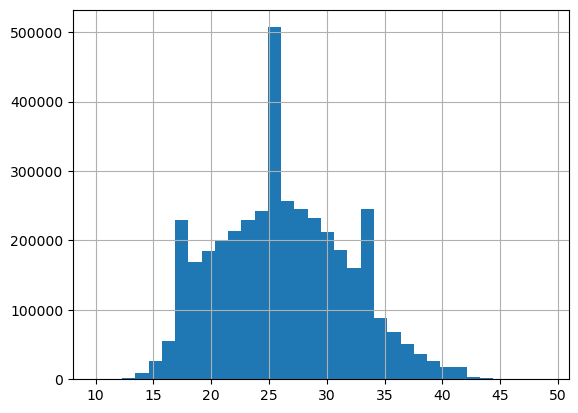

In [173]:
df.MATERNALAGE.hist(bins=34)

<Axes: >

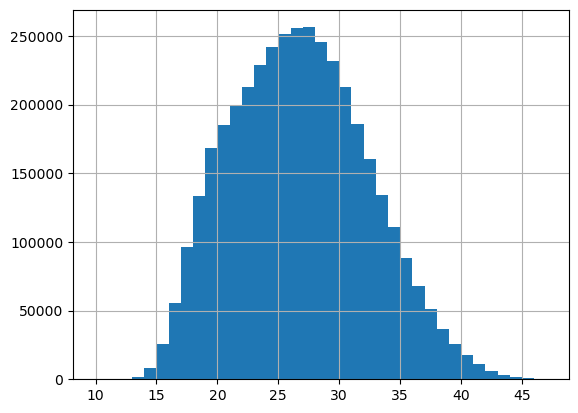

In [175]:
df.MATERNALAGE.hist(bins=np.arange(10,  48))

In [ ]:
# AAaaaaaaahhhhhhhhhhh! What happened? 

<BarContainer object of 40 artists>

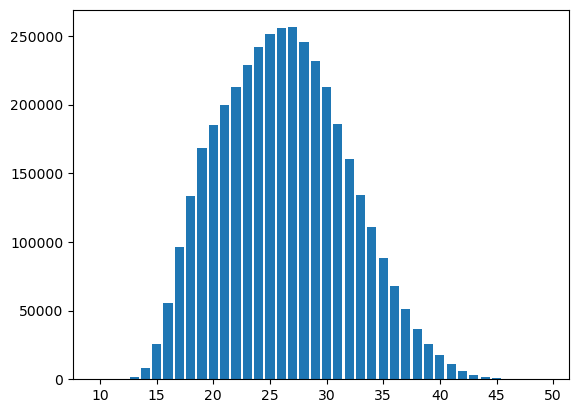

In [174]:
plt.bar(x=df.MATERNALAGE.value_counts().sort_index().index, 
        height=df.MATERNALAGE.value_counts().sort_index().values)

<BarContainer object of 40 artists>

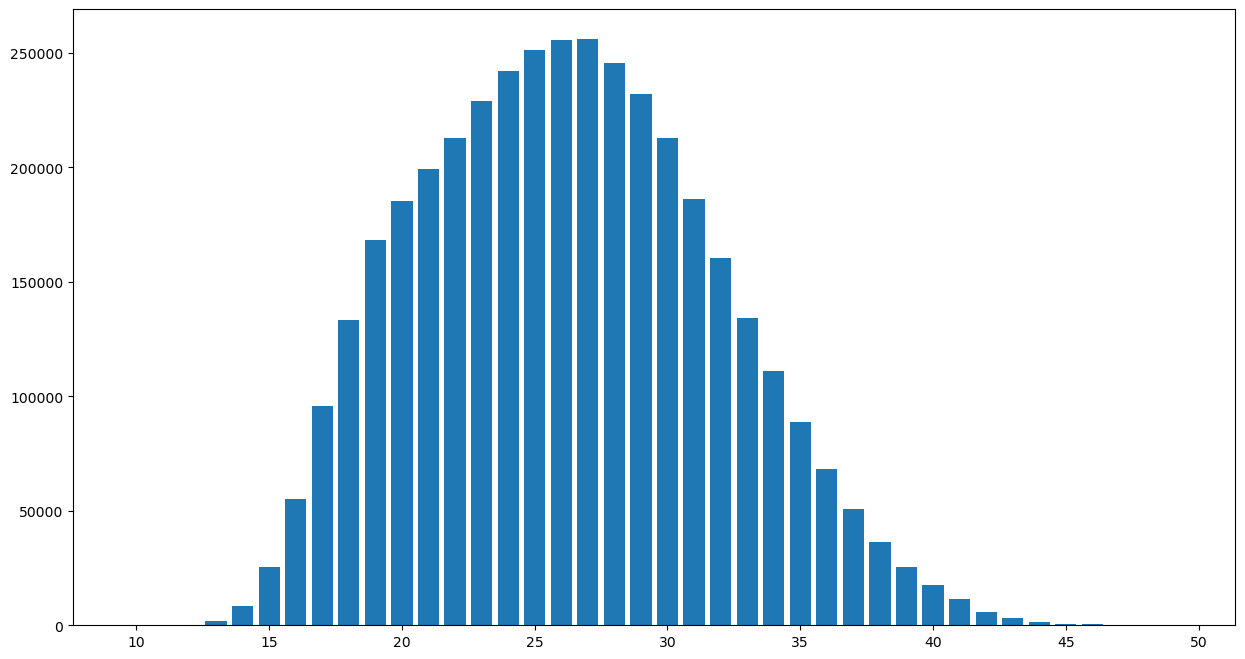

In [176]:
plt.figure(figsize=(15,8))
plt.bar(x=df.MATERNALAGE.value_counts().sort_index().index, 
        height=df.MATERNALAGE.value_counts().sort_index().values)


<Axes: >

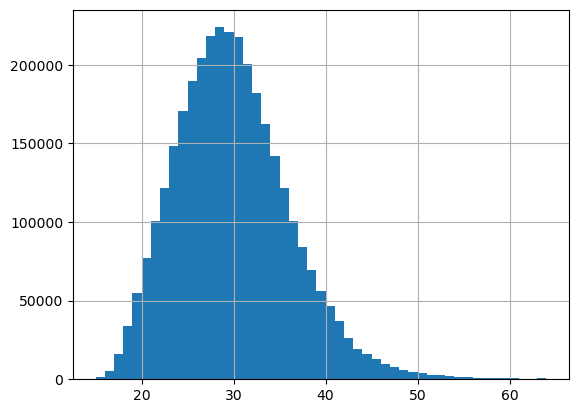

In [177]:
df.PATERNALAGE.hist(bins=np.arange(15,65))

(array([[3.30000e+02, 1.52000e+02, 1.80000e+01, 4.00000e+00, 1.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.57300e+03],
        [3.00350e+04, 5.94940e+04, 2.66400e+03, 3.02000e+02, 4.90000e+01,
         1.20000e+01, 3.00000e+00, 2.00000e+00, 0.00000e+00, 9.26790e+04],
        [2.37280e+04, 4.04708e+05, 4.97680e+04, 4.98400e+03, 7.33000e+02,
         1.60000e+02, 4.70000e+01, 1.10000e+01, 0.00000e+00, 2.02567e+05],
        [1.71000e+03, 5.29612e+05, 2.42126e+05, 2.18470e+04, 2.77900e+03,
         5.56000e+02, 1.00000e+02, 1.80000e+01, 3.00000e+00, 1.36550e+05],
        [3.33000e+02, 2.35694e+05, 6.07801e+05, 5.78670e+04, 6.03700e+03,
         9.74000e+02, 1.55000e+02, 1.90000e+01, 2.00000e+00, 8.03920e+04],
        [1.11000e+02, 4.21460e+04, 4.92953e+05, 1.03438e+05, 9.32400e+03,
         1.37100e+03, 1.97000e+02, 2.30000e+01, 6.00000e+00, 4.39780e+04],
        [4.00000e+01, 1.04440e+04, 1.55220e+05, 1.20602e+05, 1.05510e+04,
         1.51600e+03, 2.69000e+0

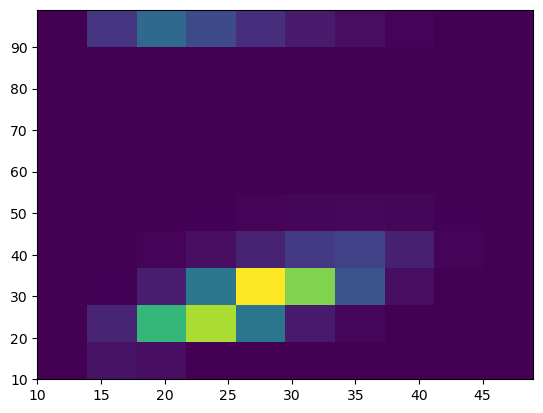

In [178]:
plt.hist2d(pd.to_numeric(df["MATERNALAGE"]), pd.to_numeric(df["PATERNALAGE"]))

(array([[0.00000e+00, 1.00000e+00, 1.00000e+00, 4.00000e+00, 5.00000e+00,
         0.00000e+00, 2.00000e+00, 3.00000e+00, 1.00000e+00, 2.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01],
        [1.00000e+00, 1.50000e+01, 1.60000e+01, 1.10000e+01, 2.00000e+00,
         3.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
         0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.75000e+02],
        [0.00000e+00, 6.80000e+01, 2.28000e+02, 8.90000e+01, 3.00000e+01,
         8.00000e+00, 6.00000e+00, 3

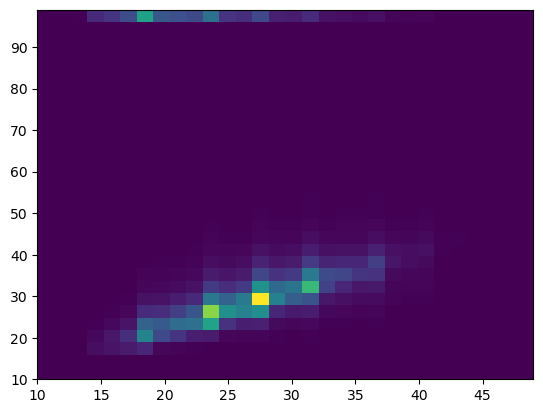

In [179]:
# More bins?
plt.hist2d(pd.to_numeric(df["MATERNALAGE"]), pd.to_numeric(df["PATERNALAGE"]), bins=30)

And here we have an example of the hisogrammer's migrane.  
The field boundaries for both MATERNALAGE and PATERNALAGE
sometimes encompass different numbers of data points on the
underlying distribution over nonnegative integers.

We can always fix this by explicitly defining the bins to 
always include integer numbers of numbers.  

In [180]:
bins1 = np.arange(10,50) +.5
bins2 = np.arange(10,100)+.5

Text(0, 0.5, 'Paternal age')

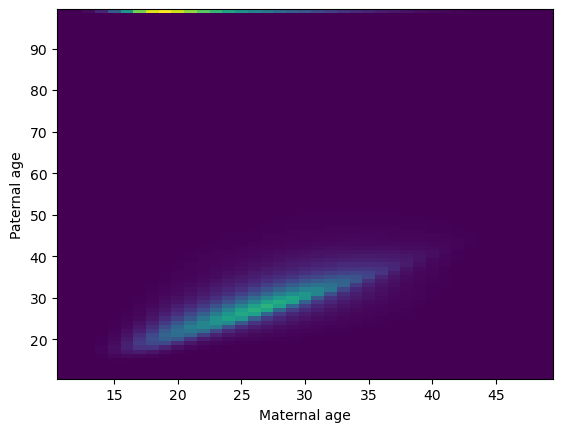

In [181]:
plt.hist2d(pd.to_numeric(df["MATERNALAGE"]), pd.to_numeric(df["PATERNALAGE"]), bins=(bins1, bins2))
plt.xlabel("Maternal age"); plt.ylabel("Paternal age")

Now we see something peculiar; the catch-all category 
PATERNALAGE=99 is a symbol for missing values.  
And just glancing at the heatmap shows the marginal
distribution of MATERNALAGE given PATERNALAGE=99 is 
peaked around 18.

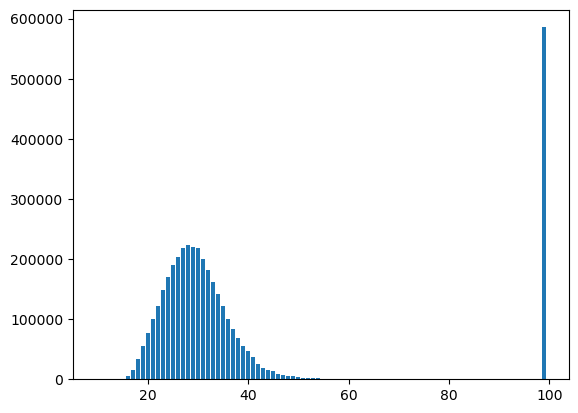

In [182]:
paternalage = df.PATERNALAGE.value_counts().sort_index()
plt.bar(paternalage.index, paternalage.values)
maternalage = df.MATERNALAGE.value_counts().sort_index()

<BarContainer object of 40 artists>

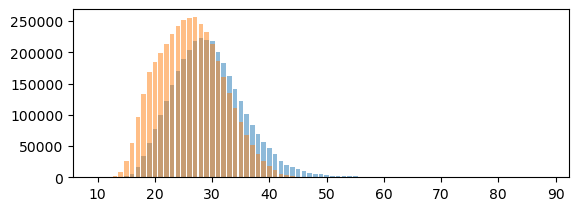

In [183]:
paternalage = df.PATERNALAGE.value_counts().sort_index()[:-1]

plt.subplot(211)
plt.bar(paternalage.index, paternalage.values, alpha=0.5)
plt.subplot(211)
plt.bar(maternalage.index, maternalage.values, alpha=0.5)

<BarContainer object of 40 artists>

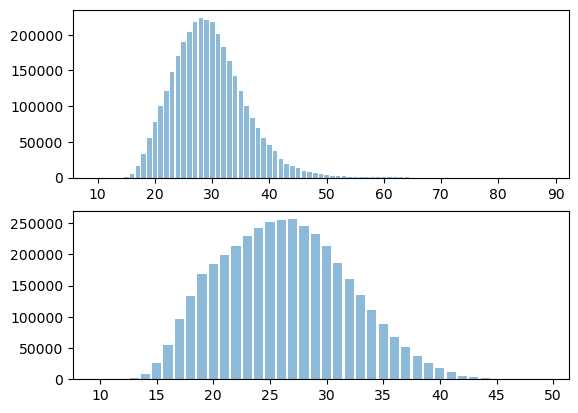

In [184]:
plt.subplot(211)
plt.bar(pd.to_numeric(paternalage.index), paternalage.values, alpha=0.5)
plt.subplot(212)
plt.bar(pd.to_numeric(maternalage.index), maternalage.values, alpha=0.5)

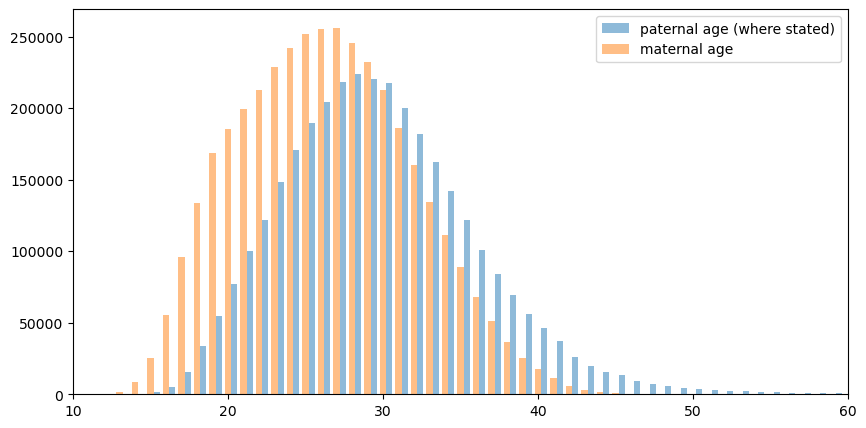

In [185]:
# If we want, we can fuss with width=, x=, and alpha= parameters to make a 
# nicer graph: 
plt.figure(figsize=(10,5))
plt.bar(pd.to_numeric(paternalage.index)+0.4, paternalage.values, width=0.4, alpha=0.5, label="paternal age (where stated)")
plt.bar(pd.to_numeric(maternalage.index), maternalage.values, width=0.4, alpha=0.5, label="maternal age")
plt.xlim(10,60)
plt.legend()

In [186]:
df["MATERNALAGE"]=pd.to_numeric(df.MATERNALAGE)

In [187]:
# Since I have a list of individual rows.. and I want something like a histogram.. I look
# into the pandas doucmentation for methods that aggregate dataframes:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html
#
gb = df.groupby(["MATERNALAGE", "STATE"])

In [188]:
gb.MATERNALAGE.median()

MATERNALAGE  STATE
10           5        10.0
             9        10.0
             10       10.0
             15       10.0
             18       10.0
                      ... 
49           24       49.0
             33       49.0
             39       49.0
             44       49.0
             50       49.0
Name: MATERNALAGE, Length: 1854, dtype: float64

In [189]:
gb = df.groupby(["STATE", "MATERNALAGE"])

In [190]:
gb.MATERNALAGE.count()

STATE  MATERNALAGE
1      12                8
       13               61
       14              221
       15              613
       16             1319
                      ... 
51     43                4
       44                4
       45                2
       46                2
       47                1
Name: MATERNALAGE, Length: 1854, dtype: int64

In [ ]:
gb.STATE.count()

In [191]:
df.groupby("STATE")["MATERNALAGE"].median()

STATE
1     25.0
2     26.0
3     26.0
4     24.0
5     27.0
6     27.0
7     28.0
8     26.0
9     28.0
10    26.0
11    25.0
12    27.0
13    26.0
14    26.0
15    25.0
16    26.0
17    26.0
18    25.0
19    25.0
20    26.0
21    26.0
22    28.0
23    26.0
24    27.0
25    24.0
26    26.0
27    26.0
28    26.0
29    26.0
30    27.0
31    28.0
32    25.0
33    27.0
34    25.0
35    26.0
36    26.0
37    25.0
38    26.0
39    27.0
40    27.0
41    25.0
42    26.0
43    25.0
44    25.0
45    26.0
46    27.0
47    26.0
48    26.0
49    24.0
50    27.0
51    26.0
Name: MATERNALAGE, dtype: float64

In [192]:
df.groupby("STATE")["MATERNALAGE"].mean()

STATE
1     25.035715
2     26.700855
3     25.816571
4     24.568353
5     26.734259
6     26.775627
7     27.470406
8     26.206497
9     27.550279
10    25.974735
11    25.310784
12    26.900546
13    26.059821
14    26.433457
15    25.555411
16    26.364016
17    26.001783
18    25.012187
19    25.221079
20    26.038196
21    26.512037
22    27.607194
23    26.152437
24    27.145806
25    24.478180
26    25.915768
27    26.550777
28    26.589467
29    25.947413
30    26.957955
31    27.360161
32    25.622012
33    27.249488
34    25.313432
35    26.614282
36    25.944082
37    25.166828
38    26.500327
39    26.636322
40    26.805296
41    25.136955
42    26.236115
43    25.105536
44    25.628031
45    26.471840
46    26.947402
47    26.362484
48    26.657054
49    24.964651
50    26.609306
51    25.970745
Name: MATERNALAGE, dtype: float64

In [ ]:
#If only we could decode the states, we would see which states have on average older mothers.

* Fail early and often
* Invest in faster feedback
** Hack at code with data subset
* Specify what you want before you do it
* Get it right first, make it fast later
* Usually better to use p

In [ ]:
# Cleaning up the numbers which are symbols is a little messier.  It is left as an exercise for the student.



In [193]:
h = {}
for line in open("../data/STATE2829decoder.csv"):
    fields = line.strip().split()
    h[int(fields[0])] = fields[1]
h

{1: 'AL',
 2: 'AK',
 3: 'AZ',
 4: 'AR',
 5: 'CA',
 6: 'CO',
 7: 'CT',
 8: 'DE',
 9: 'DC',
 10: 'FL',
 11: 'GA',
 12: 'HI',
 13: 'ID',
 14: 'IL',
 15: 'IN',
 16: 'IA',
 17: 'KS',
 18: 'MD',
 19: 'ME',
 20: 'LA',
 21: 'KY',
 22: 'MA',
 23: 'MI',
 24: 'MN',
 25: 'MS',
 26: 'MO',
 27: 'MT',
 28: 'NE',
 29: 'NV',
 30: 'NH',
 31: 'NJ',
 32: 'NM',
 33: 'NY',
 34: 'NC',
 35: 'ND',
 36: 'OH',
 37: 'OK',
 38: 'OR',
 39: 'PA',
 40: 'RI',
 41: 'SC',
 42: 'SD',
 43: 'TN',
 44: 'TX',
 45: 'UT',
 46: 'VT',
 47: 'VA',
 48: 'WA',
 49: 'WV',
 50: 'WI',
 51: 'WY'}

In [ ]:
h

In [ ]:
df

In [194]:
df["STATEA"] = df.STATE.apply(lambda x: h[x])
df

,MONTHOFBIRTH,DAYOFMONTH,BIRTHODRDER,MATERNALAGE,STATE,PATERNALAGE,STATEA
0,1,8,2,23,1,22,AL
1,1,1,1,16,1,99,AL
2,1,7,3,24,1,26,AL
3,1,6,1,24,1,99,AL
4,1,1,4,26,1,99,AL
...,...,...,...,...,...,...,...
3913788,6,28,2,19,51,20,WY
3913789,7,11,1,20,51,99,WY
3913790,12,18,4,24,51,99,WY
3913791,12,20,6,29,51,30,WY


In [ ]:
df.groupby(by = ["STATEA"]).MATERNALAGE.median()

In [195]:
df.groupby(by = ["STATEA"]).MATERNALAGE.median().sort_values()

STATEA
MS    24.0
AR    24.0
WV    24.0
ME    25.0
MD    25.0
TX    25.0
TN    25.0
NC    25.0
SC    25.0
GA    25.0
OK    25.0
AL    25.0
IN    25.0
NM    25.0
WA    26.0
ND    26.0
NE    26.0
OH    26.0
MT    26.0
SD    26.0
UT    26.0
VA    26.0
NV    26.0
OR    26.0
AK    26.0
WY    26.0
MI    26.0
LA    26.0
KY    26.0
AZ    26.0
KS    26.0
IL    26.0
ID    26.0
IA    26.0
MO    26.0
DE    26.0
FL    26.0
WI    27.0
VT    27.0
CA    27.0
CO    27.0
MN    27.0
PA    27.0
NY    27.0
NH    27.0
RI    27.0
HI    27.0
DC    28.0
CT    28.0
NJ    28.0
MA    28.0
Name: MATERNALAGE, dtype: float64

In [ ]:
medianages = df.groupby(by = ["STATEA"]).MATERNALAGE.median().sort_values()
meanages = df.groupby(by = ["STATEA"]).MATERNALAGE.mean().sort_values()

plt.bar(medianages.index, medianages.values)
plt.bar(meanages.index, meanages.values, alpha=0.4)

In [ ]:
df[["STATEA", "MATERNALAGE"]].groupby(by = ["STATEA"]).boxplot()

In [ ]:
import seaborn as sns

/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


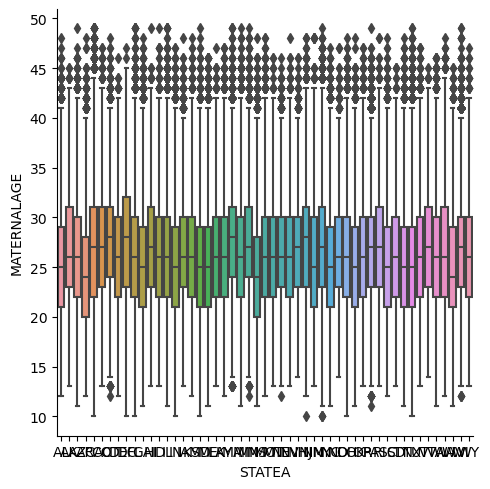

In [196]:
sns.catplot(data = df, kind="box", y="MATERNALAGE", x="STATEA")

/Users/wltrimbl/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, 'MS'),
  Text(1, 0, 'AR'),
  Text(2, 0, 'WV'),
  Text(3, 0, 'ME'),
  Text(4, 0, 'MD'),
  Text(5, 0, 'TX'),
  Text(6, 0, 'TN'),
  Text(7, 0, 'NC'),
  Text(8, 0, 'SC'),
  Text(9, 0, 'GA'),
  Text(10, 0, 'OK'),
  Text(11, 0, 'AL'),
  Text(12, 0, 'IN'),
  Text(13, 0, 'NM'),
  Text(14, 0, 'WA'),
  Text(15, 0, 'ND'),
  Text(16, 0, 'NE'),
  Text(17, 0, 'OH'),
  Text(18, 0, 'MT'),
  Text(19, 0, 'SD'),
  Text(20, 0, 'UT'),
  Text(21, 0, 'VA'),
  Text(22, 0, 'NV'),
  Text(23, 0, 'OR'),
  Text(24, 0, 'AK'),
  Text(25, 0, 'WY'),
  Text(26, 0, 'MI'),
  Text(27, 0, 'LA'),
  Text(28, 0, 'KY'),
  Text(29, 0, 'AZ'),
  Text(30, 0, 'KS'),
  Text(31, 0, 'IL'),
  Text(32, 0, 'ID'),
  Text(33, 0, 'IA'),
  Text(34, 0, 'MO'),
  Text(35, 0, 'DE'),
  Text(36, 0, 'FL'),
  T

<Figure size 800x400 with 0 Axes>

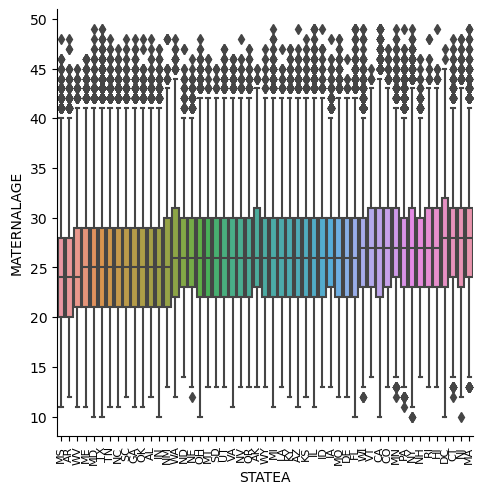

In [197]:
plt.figure(figsize=(8,4))
sns.catplot(data = df, kind="box", y="MATERNALAGE", x="STATEA", 
            order = df.groupby(by = ["STATEA"]).MATERNALAGE.median().sort_values().index)
plt.xticks(rotation=90, fontsize=8)

(10.0, 50.0)

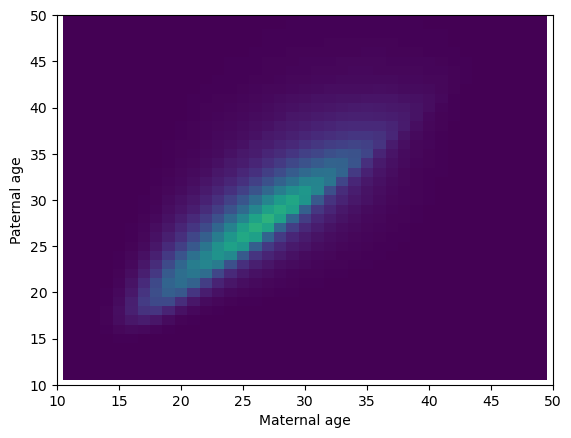

In [199]:
plt.hist2d(pd.to_numeric(df["MATERNALAGE"]), pd.to_numeric(df["PATERNALAGE"]), bins=(bins1, bins2))
plt.xlabel("Maternal age"); plt.ylabel("Paternal age")
plt.ylim(10,50)
plt.xlim(10,50)